In [1]:
#３層のニューラルネットワークとMNISTデータセットの学習のコード
#CSV入手先　https://pjreddie.com/projects/mnist-in-csv/
#60,000個の学習データと1,000個のテストデータ
import numpy
import scipy.special        #シグモイド関数expit()使用のため
import matplotlib.pyplot    #配列の描画ライブラリ
#外部ウィンドウでなくノート内に表示
%matplotlib inline

# ニューラルネットワーククラスの定義
class neuralNetwork:
    
    # ニューラルネットワークの初期化
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 入力層　隠れ層　出力層のノード数の設定
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
    # リンクの重み3*3の行列を作る 
    #input-hiddenのweight（wih）　と　hidden-outputのweight（who）の２種類
        # 行列内の重み weight_ノードi_ノードjへのリンクの重み
        # 重みの値は、0.0を平均としてリンクの数の平方根の逆数の範囲にする。pow(self.hnodes, -0.5)はself.hnodesを-1/2乗(power)している（つまり平方根の逆数を取る計算）
        # numpy.random.normal（loc（平均） = 0.0、scale（範囲） = 1.0、size = None(例えば(2,3)なら2行3列の行列を作る) ）
        # w11 w21
        # w12 w22　など
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
    # 学習率の設定
        self.lr = learningrate
        
    # 活性化関数（シグモイド関数）の定義
        self.activation_function = lambda x: scipy.special.expit(x)
      
    
        pass
    
    # ニューラルネットワークの学習
    def train():
        
    #---------------------------------入力値と出力値の計算--------------------------------------------------------------
        # 入力リストを行列に変換（.Tは.transpose()と一緒で転置行列を表す）
            #入力は横並びのリストに入れるので、それを縦に並べる処理
            # 例：
            # input=>  a = ([1.0, 0.5, -1.5])
            # input=>  b = numpy.array(a, ndmin=2).T
            # input=>  b
            # output=>  array([[ 1. ],
            # output=>     [ 0.5],
            # output=>     [-1.5]])
        
            # numpy.array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)
            # ndminは結果の配列に必要な最小次元数を指定します。この要件を満たすために、必要に応じて形状にあらかじめペンディングされます。
       
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T    #targetsは目標出力
        
        
        #　隠れ層に入ってくる信号の計算
        # 重みとinputの行列を計算して出力値をだす
          #numpy.dot(a, b, out = None)
          # aは左からかける行列　bは右からかける行列
        hidden_inputs = numpy.dot(self.wih,inputs)
        
        
        # 隠れ層で結合された信号を活性化関数により出力
        hidden_outputs = self.activation_function(hidden_inputs)

        #　出力層に入ってくる信号の計算
        final_inputs = numpy.dot(self.who,hidden_outputs)
        # 出力層で結合された信号を活性化関数により出力
        final_outputs = self.activation_function(final_inputs)

    #---------------------------------誤差逆伝播の計算--------------------------------------------------------------
        #目標出力(targets) と最終出力(final_outputs)の差分を計算して出力層の誤差を求め、それを使って転置行列をかけると隠れ層の誤差が更新される。
        
        #出力層の誤差 = (目標出力(targets) - 最終出力(final_outputs)) 
        output_errors = targets - final_outputs
        #隠れ層の誤差は出力層の誤差をリンクの重みの割合で更新（転置行列をかける）
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
    #---------------------------------重みの更新の計算--------------------------------------------------------------
        
        #上で誤差が更新されたら、その誤差を使って重みを更新する
    
        #隠れ層と出力層の間のリンクの重みを更新
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        #入力層と隠れ層の間のリンクの重みを更新
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    
        pass
    
    
    
    # ニューラルネットワークへの照会
    def query(self, inputs_list):
        
        # 入力リストを行列に変換
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        #　隠れ層に入ってくる信号の計算
        hidden_inputs = numpy.dot(self.wih,inputs)
        # 隠れ層で結合された信号を活性化関数により出力
        hidden_outputs = self.activation_function(hidden_inputs)

        #　出力層に入ってくる信号の計算
        final_inputs = numpy.dot(self.who,hidden_outputs)
        # 出力層で結合された信号を活性化関数により出力
        final_outputs = self.activation_function(final_inputs)

        return final_outputs


#入力層　隠れ層　出力層のノード数
input_nodes = 784 #28pix*28pixのデータ
hidden_nodes = 100 #outputが10だから10~784の間だったら幾つでも良い
output_nodes = 10 #結果データは0,1,2,3,4,5,6,7,8,9の１０個のうちどれか

#学習率
learning_rate = 0.3

#ニューラルネットワークのインスタンスの生成
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)


# MNIST訓練データのCSVファイルを読み込む

training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()


#ニューラルネットワークの学習


# 訓練データの全データに対して実行

for record in training_data_list:
    #データを','で区切る
    all_values = record.split(',')

    #RGBのカラー値の範囲（0から255）のデータを0.01から1.00の範囲に変換する
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    #ゼロで埋められた配列を作成。 0と1が使えないので0.01を加える。
    targets = numpy.zeros(output_nodes) + 0.01

    #all_valuesから１列目（正しい答えが書いてある値）を取り出し、整数に変換（ソースファイルからは文字列として読み込まれるので）
    targets[int(all_values[0])] = 0.99

    print(inputs, targets)

#image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
#matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')
    
    pass
    

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

 0.01       0.01       0.01       0.01      ] [0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.0

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

 0.01       0.01       0.01       0.01      ] [0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.0

In [4]:
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [5]:
all_values = test_data_list[0].split(',')
#ラベルを出力
print(all_values[0])

7


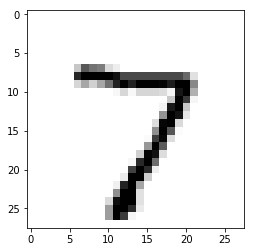

In [6]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')

In [7]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.07496427],
       [0.13453822],
       [0.69192309],
       [0.74397726],
       [0.17956681],
       [0.88111202],
       [0.72312232],
       [0.81413892],
       [0.07410917],
       [0.03836048]])

In [8]:
#ニューラルネットワークのテスト

# scorecardは判定のリスト、最初は空
scorecard = []

#テストデータのすべてのデータに対して実行
for record in test_data_list:
    #データをコンマ','でsplit
    all_values = record.split(',')
    
    #正解は配列の一番目の値
    correct_label = int(all_values[0])
    print(correct_label, "answer")

    #入力値のスケーリングとシフト
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    #ネットワークへの照会
    outputs = n.query(inputs)
    
    #最大値のインデックスがラベルに対応 numpy.argmaxで最も高い数値の場所を返してくれる
    label = numpy.argmax(outputs)
    print(label, "nueral_network_anser")
    
    #正解(1),間違い(0)をリストに追加
    if (label == correct_label):
        #正解なら1を追加
        scorecard.append(1)
    
    else:
        #間違いなら0を追加
        scorecard.append(0)
        pass
    pass

print(scorecard)

7 answer
5 nueral_network_anser
2 answer
3 nueral_network_anser
1 answer
5 nueral_network_anser
0 answer
7 nueral_network_anser
4 answer
5 nueral_network_anser
1 answer
5 nueral_network_anser
4 answer
5 nueral_network_anser
9 answer
3 nueral_network_anser
5 answer
5 nueral_network_anser
9 answer
7 nueral_network_anser
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [10]:
#正答率の計算 numpy.asarray
scorecard_array = numpy.asarray(scorecard)
print ("performance =", scorecard_array.sum() / scorecard_array.size)

performance = 0.1


In [ ]:
#ニューラルネットワークの学習

#epochs = 2

for
